## 2a

In [253]:
import pandas as pd
import seaborn as sns
import json
from glob import glob
import statistics
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Simona
[nltk_data]     Mihaylova\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [254]:
vclaims_path = '../data/subtask-2a--english/vclaims'
iclaims_train_dev_file = '../data/subtask-2a--english/tweets-train-dev.tsv'
train_gold_file = '../data/subtask-2a--english/qrels-train.tsv'
dev_gold_file = '../data/subtask-2a--english/qrels-dev.tsv'

In [255]:
def load_vclaims(dir):
    vclaims_fp = glob(f'{dir}/*.json')
    vclaims_fp.sort()
    vclaims = {}
    for vclaim_fp in vclaims_fp:
        with open(vclaim_fp) as f:
            vclaim = json.load(f)
        vclaims[vclaim['vclaim_id']] = vclaim
    return vclaims

In [256]:
vclaims = load_vclaims(vclaims_path)
iclaims = pd.read_csv(iclaims_train_dev_file, sep='\t', names=['iclaim_id', 'iclaim'])
train_gold = pd.read_csv(train_gold_file, sep='\t', names=['iclaim_id', '0', 'vclaim_id', 'relevance'])
dev_gold = pd.read_csv(dev_gold_file, sep='\t', names=['iclaim_id', '0', 'vclaim_id', 'relevance'])

In [257]:
len(vclaims)

13824

In [259]:
vclaims

{'vclaim-sno-1-mcdonald39s-any-size-fries': {'title': "$1 McDonald's Any Size Fries",
  'subtitle': "Rumor: McDonald's restaurants are offering $1 Any Size Fries between May 18 and 31.",
  'author': 'David Mikkelson',
  'date': '26 May 2015',
  'vclaim_id': 'vclaim-sno-1-mcdonald39s-any-size-fries',
  'vclaim': 'McDonald’s restaurants are offering $1 Any Size Fries between May 18 and 31.'},
 'vclaim-sno-10-meter-anaconda': {'title': 'Does Video Show a 10-Meter-Long Anaconda?',
  'subtitle': 'The anaconda is one of the largest snakes in the world.',
  'author': 'Dan Evon',
  'date': '6 March 2021',
  'vclaim_id': 'vclaim-sno-10-meter-anaconda',
  'vclaim': 'A viral video shows a 10-meter-long anaconda swimming across a river in Brazil.'},
 'vclaim-sno-10-month-old-baby-drawing': {'title': 'Is This Really a Video of a 10-Month-Old Baby Drawing?',
  'subtitle': 'Internet users were impressed with (and skeptical of) a video showing a baby drawing cartoon characters.',
  'author': 'Dan Evon

In [260]:
vclaims = pd.DataFrame.from_dict(vclaims.values())

In [261]:
vclaims

,title,subtitle,author,date,vclaim_id,vclaim
0,$1 McDonald's Any Size Fries,Rumor: McDonald's restaurants are offering $1 ...,David Mikkelson,26 May 2015,vclaim-sno-1-mcdonald39s-any-size-fries,McDonald’s restaurants are offering $1 Any Siz...
1,Does Video Show a 10-Meter-Long Anaconda?,The anaconda is one of the largest snakes in t...,Dan Evon,6 March 2021,vclaim-sno-10-meter-anaconda,A viral video shows a 10-meter-long anaconda s...
2,Is This Really a Video of a 10-Month-Old Baby ...,Internet users were impressed with (and skepti...,Dan Evon,11 March 2019,vclaim-sno-10-month-old-baby-drawing,A video shows a 10-month-old baby drawing cart...
3,100 Facebook Shares Heart Transplant,Will 100 Facebook 'shares' secure a heart tran...,David Mikkelson,5 March 2012,vclaim-sno-100-facebook-shares-appeal,100 Facebook “shares” will secure a heart tran...
4,$100 Target Coupon on Facebook,Rumor: A $100 Target coupon circulated via Fac...,David Mikkelson,22 May 2015,vclaim-sno-100-target-coupon,A $100 Target coupon circulated via Facebook i...
...,...,...,...,...,...,...
13819,Was a Zookeeper Arrested for Molesting a Gorilla?,A story claimed a San Diego Zoo employee was a...,David Emery,7 December 2017,vclaim-sno-zookeeper-arrested-molest-gorilla,A 29-year-old San Diego Zoo intern was arreste...
13820,Can Teachers Hear ‘Muted’ Students on Zoom?,Viral TikToks alleged that educators can secre...,Jessica Lee,11 February 2021,vclaim-sno-zoom-teachers-mute,"Zoom allows hosts of meetings, such as educato..."
13821,"Mark Zuckerberg Promises $1,000 to Facebook Us...",Facebook CEO Mark Zuckerberg's offering money ...,Bethania Palma,19 October 2016,vclaim-sno-zuckerberg-dont-share-hoaxes,"Mark Zuckerberg is giving $1,000 away to Faceb..."
13822,Did Mark Zuckerberg ‘Brag’ About Banning Pro-L...,Several websites grossly misrepresented and ov...,Dan MacGuill,23 July 2019,vclaim-sno-zuckerberg-facebook-ireland-ads,Mark Zuckerberg admitted or bragged that Faceb...


In [262]:
len(iclaims.iclaim_id.unique())

1196

In [263]:
len(train_gold)

999

In [264]:
len(dev_gold)

200

In [265]:
len(test_gold)

202

In [266]:
iclaims['iclaims_word_cnt'] = iclaims['iclaim'].apply(nltk.word_tokenize).apply(len)

In [267]:
iclaims['iclaims_sent_cnt'] = iclaims['iclaim'].apply(nltk.sent_tokenize).apply(len)

In [268]:
iclaims

,iclaim_id,iclaim,iclaims_word_cnt,iclaims_sent_cnt
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,55,3
1,tweet-sno-1,Trump needs to immediately divest from his bus...,58,4
2,tweet-sno-2,A number of fraudulent text messages informing...,24,1
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,52,2
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,23,1
...,...,...,...,...
1191,tweet-sno-1193,"You got us, there’s no Eggplant condom! But wh...",39,4
1192,tweet-sno-1194,A bit of rain and Eid and the roads run red wi...,30,2
1193,tweet-sno-1195,@andersoncooper@HillaryClinton why did WABC NY...,29,2
1194,tweet-sno-1196,As a medical doctor of course I support vaccin...,35,3


In [269]:
iclaims['iclaims_word_cnt'].describe()

count    1196.000000
mean       41.994983
std        15.329463
min        15.000000
25%        31.000000
50%        38.000000
75%        51.000000
max       139.000000
Name: iclaims_word_cnt, dtype: float64

In [270]:
iclaims['iclaims_sent_cnt'].describe()

count    1196.000000
mean        2.500836
std         1.354676
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: iclaims_sent_cnt, dtype: float64

In [271]:
vclaims['vclaim_word_cnt'] = vclaims['vclaim'].apply(nltk.word_tokenize).apply(len)

In [272]:
vclaims['vclaim_sent_cnt'] = vclaims['vclaim'].apply(nltk.sent_tokenize).apply(len)

In [273]:
vclaims['title_word_cnt'] = vclaims['title'].apply(nltk.word_tokenize).apply(len)
vclaims['title_sent_cnt'] = vclaims['title'].apply(nltk.sent_tokenize).apply(len)

In [274]:
vclaims['subtitle_word_cnt'] = vclaims['subtitle'].apply(nltk.word_tokenize).apply(len)
vclaims['subtitle_sent_cnt'] = vclaims['subtitle'].apply(nltk.sent_tokenize).apply(len)

In [275]:
vclaims['vclaim_word_cnt'].describe()

count    13824.000000
mean        19.128111
std          7.271306
min          1.000000
25%         14.000000
50%         18.000000
75%         23.000000
max        122.000000
Name: vclaim_word_cnt, dtype: float64

In [276]:
vclaims['vclaim_sent_cnt'].describe()

count    13824.000000
mean         1.024089
std          0.178205
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: vclaim_sent_cnt, dtype: float64

In [277]:
vclaims['title_word_cnt'].describe()

count    13824.000000
mean        10.321108
std          4.400907
min          1.000000
25%          7.000000
50%         11.000000
75%         13.000000
max         29.000000
Name: title_word_cnt, dtype: float64

In [278]:
vclaims['title_sent_cnt'].describe()

count    13824.000000
mean         1.013383
std          0.118628
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: title_sent_cnt, dtype: float64

In [279]:
vclaims['subtitle_word_cnt'].describe()

count    13824.000000
mean        19.750434
std          6.234656
min          0.000000
25%         15.000000
50%         20.000000
75%         24.000000
max         51.000000
Name: subtitle_word_cnt, dtype: float64

In [280]:
vclaims['subtitle_sent_cnt'].describe()

count    13824.000000
mean         1.027922
std          0.179871
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: subtitle_sent_cnt, dtype: float64

In [293]:
sns.set(font_scale = 1.5)

<AxesSubplot:xlabel="Брой изречения в полето 'vclaim'", ylabel='Брой проверени твърдения'>

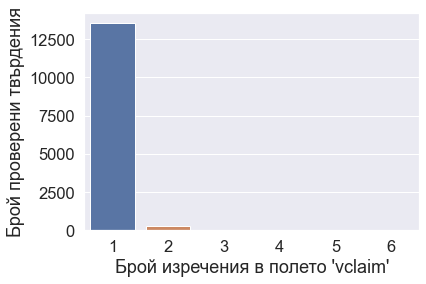

In [294]:
import matplotlib.pyplot as plt

plot_vclaim = sns.countplot(x='vclaim_sent_cnt', data=vclaims )
plot_vclaim.set(xlabel='Брой изречения в полето \'vclaim\'', ylabel='Брой проверени твърдения')

plot_vclaim

<AxesSubplot:xlabel="Брой изречения в полето 'title'", ylabel='Брой проверени твърдения'>

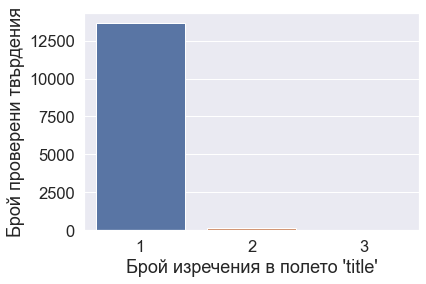

In [295]:
plot_title = sns.countplot(x='title_sent_cnt', data=vclaims )
plot_title.set(xlabel='Брой изречения в полето \'title\'', ylabel='Брой проверени твърдения')
plot_title

<AxesSubplot:xlabel="Брой изречения в полето 'subtitle'", ylabel='Брой проверени твърдения'>

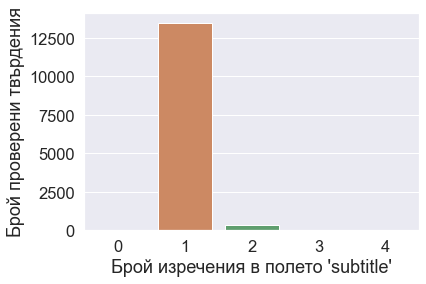

In [296]:
plot_subtitle = sns.countplot(x='subtitle_sent_cnt', data=vclaims )
plot_subtitle.set(xlabel='Брой изречения в полето \'subtitle\'', ylabel='Брой проверени твърдения')

plot_subtitle

<AxesSubplot:xlabel="Брой изречения в полето 'iclaim'", ylabel='Брой входни твърдения'>

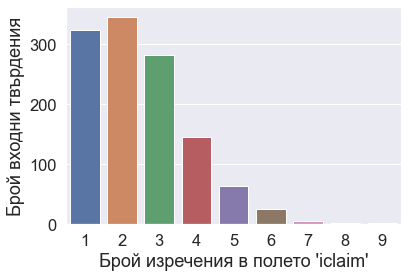

In [298]:
plot_iclaim = sns.countplot(x='iclaims_sent_cnt', data=iclaims )
plot_iclaim.set(xlabel='Брой изречения в полето \'iclaim\'', ylabel='Брой входни твърдения')
plot_iclaim

In [113]:
iclaims_date_path = '../rank_train/iclaims_date_2a.tsv'
vclaims_date_path = '../rank_train/vclaims_date_2a.tsv'

In [120]:
iclaims_date = pd.read_csv(iclaims_date_path, sep='\t')
vclaims_date = pd.read_csv(vclaims_date_path, sep='\t')

In [121]:
iclaims_date

,iclaim_id,iclaim,date,date_seconds
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,2020-01-14 00:00:00,1.578953e+09
1,tweet-sno-1,Trump needs to immediately divest from his bus...,2020-01-06 00:00:00,1.578262e+09
2,tweet-sno-2,A number of fraudulent text messages informing...,2020-01-06 00:00:00,1.578262e+09
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,2020-01-08 00:00:00,1.578434e+09
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,2020-01-06 00:00:00,1.578262e+09
...,...,...,...,...
1191,tweet-sno-1193,"You got us, there’s no Eggplant condom! But wh...",2016-09-05 00:00:00,1.473023e+09
1192,tweet-sno-1194,A bit of rain and Eid and the roads run red wi...,2016-09-13 00:00:00,1.473714e+09
1193,tweet-sno-1195,@andersoncooper@HillaryClinton why did WABC NY...,2016-09-13 00:00:00,1.473714e+09
1194,tweet-sno-1196,As a medical doctor of course I support vaccin...,2016-07-29 00:00:00,1.469740e+09


In [122]:
vclaims_date

,title,subtitle,author,date,vclaim_id,vclaim,date_seconds
0,$1 McDonald's Any Size Fries,Rumor: McDonald's restaurants are offering $1 ...,David Mikkelson,26 May 2015,vclaim-sno-1-mcdonald39s-any-size-fries,McDonald’s restaurants are offering $1 Any Siz...,1.432588e+09
1,Does Video Show a 10-Meter-Long Anaconda?,The anaconda is one of the largest snakes in t...,Dan Evon,6 March 2021,vclaim-sno-10-meter-anaconda,A viral video shows a 10-meter-long anaconda s...,1.614982e+09
2,Is This Really a Video of a 10-Month-Old Baby ...,Internet users were impressed with (and skepti...,Dan Evon,11 March 2019,vclaim-sno-10-month-old-baby-drawing,A video shows a 10-month-old baby drawing cart...,1.552255e+09
3,100 Facebook Shares Heart Transplant,Will 100 Facebook 'shares' secure a heart tran...,David Mikkelson,5 March 2012,vclaim-sno-100-facebook-shares-appeal,100 Facebook “shares” will secure a heart tran...,1.330898e+09
4,$100 Target Coupon on Facebook,Rumor: A $100 Target coupon circulated via Fac...,David Mikkelson,22 May 2015,vclaim-sno-100-target-coupon,A $100 Target coupon circulated via Facebook i...,1.432242e+09
...,...,...,...,...,...,...,...
13819,Was a Zookeeper Arrested for Molesting a Gorilla?,A story claimed a San Diego Zoo employee was a...,David Emery,7 December 2017,vclaim-sno-zookeeper-arrested-molest-gorilla,A 29-year-old San Diego Zoo intern was arreste...,1.512598e+09
13820,Can Teachers Hear ‘Muted’ Students on Zoom?,Viral TikToks alleged that educators can secre...,Jessica Lee,11 February 2021,vclaim-sno-zoom-teachers-mute,"Zoom allows hosts of meetings, such as educato...",1.612994e+09
13821,"Mark Zuckerberg Promises $1,000 to Facebook Us...",Facebook CEO Mark Zuckerberg's offering money ...,Bethania Palma,19 October 2016,vclaim-sno-zuckerberg-dont-share-hoaxes,"Mark Zuckerberg is giving $1,000 away to Faceb...",1.476824e+09
13822,Did Mark Zuckerberg ‘Brag’ About Banning Pro-L...,Several websites grossly misrepresented and ov...,Dan MacGuill,23 July 2019,vclaim-sno-zuckerberg-facebook-ireland-ads,Mark Zuckerberg admitted or bragged that Faceb...,1.563829e+09


In [123]:
iclaims_date

,iclaim_id,iclaim,date,date_seconds
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,2020-01-14 00:00:00,1.578953e+09
1,tweet-sno-1,Trump needs to immediately divest from his bus...,2020-01-06 00:00:00,1.578262e+09
2,tweet-sno-2,A number of fraudulent text messages informing...,2020-01-06 00:00:00,1.578262e+09
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,2020-01-08 00:00:00,1.578434e+09
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,2020-01-06 00:00:00,1.578262e+09
...,...,...,...,...
1191,tweet-sno-1193,"You got us, there’s no Eggplant condom! But wh...",2016-09-05 00:00:00,1.473023e+09
1192,tweet-sno-1194,A bit of rain and Eid and the roads run red wi...,2016-09-13 00:00:00,1.473714e+09
1193,tweet-sno-1195,@andersoncooper@HillaryClinton why did WABC NY...,2016-09-13 00:00:00,1.473714e+09
1194,tweet-sno-1196,As a medical doctor of course I support vaccin...,2016-07-29 00:00:00,1.469740e+09


In [124]:
iclaims_date = dict(zip(iclaims_date['iclaim_id'],iclaims_date['date_seconds']))


In [125]:
iclaims_date

{'tweet-sno-0': 1578952800.0,
 'tweet-sno-1': 1578261600.0,
 'tweet-sno-2': 1578261600.0,
 'tweet-sno-3': 1578434400.0,
 'tweet-sno-4': 1578261600.0,
 'tweet-sno-5': 1578261600.0,
 'tweet-sno-6': 1578175200.0,
 'tweet-sno-7': 1578175200.0,
 'tweet-sno-8': 1577916000.0,
 'tweet-sno-9': 1577916000.0,
 'tweet-sno-10': 1577397600.0,
 'tweet-sno-11': 1577311200.0,
 'tweet-sno-12': 1577138400.0,
 'tweet-sno-13': 1577052000.0,
 'tweet-sno-14': 1534885200.0,
 'tweet-sno-15': 1576620000.0,
 'tweet-sno-16': 1576706400.0,
 'tweet-sno-17': 1574373600.0,
 'tweet-sno-18': 1576015200.0,
 'tweet-sno-19': 1575756000.0,
 'tweet-sno-20': 1575842400.0,
 'tweet-sno-21': 1478642400.0,
 'tweet-sno-22': 1573596000.0,
 'tweet-sno-23': 1572472800.0,
 'tweet-sno-24': 1569704400.0,
 'tweet-sno-25': 1569186000.0,
 'tweet-sno-26': 1569099600.0,
 'tweet-sno-27': 1567112400.0,
 'tweet-sno-28': 1568926800.0,
 'tweet-sno-29': 1568840400.0,
 'tweet-sno-30': 1568581200.0,
 'tweet-sno-31': 1566766800.0,
 'tweet-sno-32': 1

In [126]:
vclaims_date = dict(zip(vclaims_date['vclaim_id'],vclaims_date['date_seconds']))
vclaims_date

{'vclaim-sno-1-mcdonald39s-any-size-fries': 1432587600.0,
 'vclaim-sno-10-meter-anaconda': 1614981600.0,
 'vclaim-sno-10-month-old-baby-drawing': 1552255200.0,
 'vclaim-sno-100-facebook-shares-appeal': 1330898400.0,
 'vclaim-sno-100-target-coupon': 1432242000.0,
 'vclaim-sno-10000-camels-culled-australia': 1578434400.0,
 'vclaim-sno-100k-for-600-stimulus-checks': 1608674400.0,
 'vclaim-sno-101-year-old-mom-gives-birth': 1459285200.0,
 'vclaim-sno-102-lb-shrimp': 1448575200.0,
 'vclaim-sno-106-dead-in-california-music-festival-bombing': 1470949200.0,
 'vclaim-sno-10cc': 950479200.0,
 'vclaim-sno-11-marines-this-week': 1533243600.0,
 'vclaim-sno-11-states-ban-ecigs-in-cars': 1472418000.0,
 'vclaim-sno-110-pound-squirrel': 1540764000.0,
 'vclaim-sno-110-yard-field-goal': 1389218400.0,
 'vclaim-sno-12-churches-france': 1555534800.0,
 'vclaim-sno-12-week-photo': 1384034400.0,
 'vclaim-sno-12th-amendment-path-to-victory': 1605823200.0,
 'vclaim-sno-14-year-old-pregnant-flu-shot': 1443992400.

In [128]:
train_gold

,iclaim_id,0,vclaim_id,relevance
0,tweet-sno-0,0,vclaim-sno-hero-wombats-australia-fires,1
1,tweet-sno-1,0,vclaim-sno-ilhan-omar-treason-advice-iran,1
2,tweet-sno-2,0,vclaim-sno-us-army-sending-texts-on-draft,1
3,tweet-sno-3,0,vclaim-sno-us-army-sending-texts-on-draft,1
4,tweet-sno-4,0,vclaim-sno-video-of-drone-strike-soleimani,1
...,...,...,...,...
994,tweet-sno-994,0,vclaim-sno-nfl-fining-players-for-wearing-911-...,1
995,tweet-sno-995,0,vclaim-sno-nfl-fining-players-for-wearing-911-...,1
996,tweet-sno-996,0,vclaim-sno-julian-assange-bernie-sanders-was-t...,1
997,tweet-sno-997,0,vclaim-sno-durex-to-produce-eggplant-flavored-...,1


In [299]:
import math

gold_iclaim_dates = []
gold_vclaim_dates = []
gold_dates_diff = []
for idx, row in train_gold.iterrows():
    iclaim_date = iclaims_date[row['iclaim_id']]
    vclaim_date = vclaims_date[row['vclaim_id']]
    gold_iclaim_dates.append(iclaim_date)
    gold_vclaim_dates.append(vclaim_date)
    diff = abs(iclaim_date - vclaim_date)
    
    if diff > 0:
        diff = int(diff / 86000) #conv secondss to hours #math.log(diff)
        
    gold_dates_diff.append(diff)

    

In [300]:
train_gold['iclaim_date'] = gold_iclaim_dates
train_gold['vclaim_date'] = gold_vclaim_dates
train_gold['date_diff_days'] = gold_dates_diff

In [301]:
train_gold

,iclaim_id,0,vclaim_id,relevance,iclaim_date,vclaim_date,date_diff_days
0,tweet-sno-0,0,vclaim-sno-hero-wombats-australia-fires,1,1.578953e+09,1.579126e+09,2.0
1,tweet-sno-1,0,vclaim-sno-ilhan-omar-treason-advice-iran,1,1.578262e+09,1.578866e+09,7.0
2,tweet-sno-2,0,vclaim-sno-us-army-sending-texts-on-draft,1,1.578262e+09,1.578434e+09,2.0
3,tweet-sno-3,0,vclaim-sno-us-army-sending-texts-on-draft,1,1.578434e+09,1.578434e+09,0.0
4,tweet-sno-4,0,vclaim-sno-video-of-drone-strike-soleimani,1,1.578262e+09,1.578348e+09,1.0
...,...,...,...,...,...,...,...
994,tweet-sno-994,0,vclaim-sno-nfl-fining-players-for-wearing-911-...,1,1.473628e+09,1.473628e+09,0.0
995,tweet-sno-995,0,vclaim-sno-nfl-fining-players-for-wearing-911-...,1,1.473541e+09,1.473628e+09,1.0
996,tweet-sno-996,0,vclaim-sno-julian-assange-bernie-sanders-was-t...,1,1.473368e+09,1.473368e+09,0.0
997,tweet-sno-997,0,vclaim-sno-durex-to-produce-eggplant-flavored-...,1,1.473023e+09,1.473282e+09,3.0


In [302]:
train_gold['date_diff_days'].describe()

count     974.000000
mean      106.416838
std       378.085553
min         0.000000
25%         0.000000
50%         2.000000
75%         8.000000
max      5871.000000
Name: date_diff_days, dtype: float64

[Text(0.5, 0, 'Разлика в брой дни между датите на входното \n и провереното твърдение от обучаващите данни')]

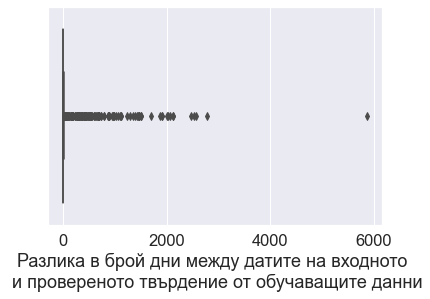

In [310]:
boxplot_diff_days = sns.boxplot(x=train_gold['date_diff_days'])
boxplot_diff_days.set(xlabel='Разлика в брой дни между датите на входното \n и провереното твърдение от обучаващите данни')

[Text(0.5, 0, 'Разлика в брой дни между датите на входното \n и провереното твърдение от обучаващите данни \n (без outlier-ите)')]

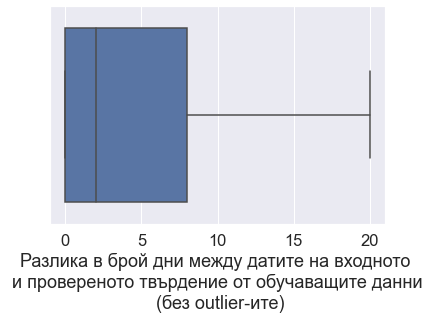

In [311]:
boxplot_diff_days_no_outliers = sns.boxplot(x = train_gold['date_diff_days'], showfliers = False)
boxplot_diff_days_no_outliers.set(xlabel='Разлика в брой дни между датите на входното \n и провереното твърдение от обучаващите данни \n (без outlier-ите)')

In [313]:
del vclaims


In [314]:
del iclaims

# 2b

In [315]:
vclaims_path_politifact = '../data/subtask-2b--english/politifact-vclaims'
iclaims_train_dev_file_politifact = '../data/subtask-2b--english/v1/iclaims.queries'
train_gold_file_politifact = '../data/subtask-2b--english/v1/train.tsv'
dev_gold_file_politifact = '../data/subtask-2b--english/v1/dev.tsv'

In [316]:
vclaims_politifact = load_vclaims(vclaims_path_politifact)
iclaims_politifact = pd.read_csv(iclaims_train_dev_file_politifact, sep='\t', names=['iclaim_id', 'iclaim'])
train_gold_politifact = pd.read_csv(train_gold_file_politifact, sep='\t', names=['iclaim_id', '0', 'vclaim_id', 'relevance'])
dev_gold_politifact = pd.read_csv(dev_gold_file_politifact, sep='\t', names=['iclaim_id', '0', 'vclaim_id', 'relevance'])

In [317]:
len(vclaims_politifact)

19250

In [318]:
len(iclaims_politifact.iclaim_id.unique())

591

In [319]:
len(train_gold_politifact)

562

In [320]:
len(dev_gold_politifact)

140

In [321]:
len(test_gold_politifact)

103

In [322]:
iclaims_politifact['iclaims_word_cnt'] = iclaims_politifact['iclaim'].apply(nltk.word_tokenize).apply(len)

In [323]:
iclaims_politifact['iclaims_sent_cnt'] = iclaims_politifact['iclaim'].apply(nltk.sent_tokenize).apply(len)

In [325]:
iclaims_politifact

,iclaim_id,iclaim,iclaims_word_cnt,iclaims_sent_cnt
0,20121023_third_presidential_debate_0959,You were very clear that you would not provide...,23,1
1,20121023_third_presidential_debate_0985,The policies of the last four years have seen ...,38,1
2,20121023_third_presidential_debate_0753,"And as a consequence, veterans' unemployment i...",25,1
3,20121023_third_presidential_debate_0473,I went to the Olympics that was out of balance...,23,1
4,20121023_third_presidential_debate_0609,And I think that when the president said he wa...,26,1
...,...,...,...,...
697,20190912_democratic_debate_0739,Over 90% of the American people think we have ...,19,1
698,20190912_democratic_debate_0941,We didn't lock people up in cages.,9,1
699,20190912_democratic_debate_0942,We didn't separate families.,6,1
700,20190912_democratic_debate_0584,And it's nice to go all the way back to slaver...,44,1


In [326]:
vclaims_politifact = pd.DataFrame.from_dict(vclaims_politifact.values())

In [327]:
vclaims_politifact

,url,speaker,vclaim,truth_label,date,title,text,vclaim_id
0,/factchecks/2019/oct/30/gaydonna-vandergriff/v...,GayDonna Vandergriff,Schuyler VanValkenburg co-sponsored a bill tha...,false,"stated on October 22, 2019 in a campaign mailer.:",Vandergriff inaccurately describes bill that w...,Republican GayDonna Vandergriff has turned to ...,vclaim-pol-00000
1,/factchecks/2019/oct/29/donald-trump/trump-dea...,Donald Trump,"""Over the last two years, the number of murder...",pants-fire,"stated on October 28, 2019 in a speech:",Trump ‘dead wrong’ about the change in murders...,During his first visit to Chicago since taking...,vclaim-pol-00001
2,/factchecks/2019/oct/29/instagram-posts/instag...,Instagram posts,"Says there is a 4,250% increase in fetal death...",false,"stated on October 22, 2019 in an Instagram post:",Instagram post falsely says flu shot causes fe...,"As flu season begins, some Instagram users are...",vclaim-pol-00002
3,/factchecks/2019/oct/29/brian-kolb/kolb-takes-...,Brian Kolb,"The Buffalo Billion is ""still breaking every j...",half-true,"stated on September 24, 2019 in a Tweet:",Kolb takes aim at 'Buffalo Billion' job promises,One of Gov. Andrew Cuomo’s high-profile econom...,vclaim-pol-00003
4,/factchecks/2019/oct/28/blog-posting/no-lindse...,Bloggers,Say Sen. Lindsey Graham supports the Green New...,pants-fire,"stated on October 25, 2019 in an ad on Facebook:","No, Lindsey Graham does not support the Green ...",A tiny progressive advocacy PAC with less than...,vclaim-pol-00004
...,...,...,...,...,...,...,...,...
19245,/factchecks/2021/jan/29/facebook-posts/yes-bid...,Facebook posts,Says Joe Biden’s inauguration was fake and he ...,pants-fire,"stated on January 23, 2021 in a Facebook post:","Yes, Biden’s inauguration was legitimate. No, ...",A new conspiracy theory has blossomed among so...,vclaim-pol-19245
19246,/factchecks/2021/jan/29/instagram-posts/no-mas...,Instagram posts,Masks have negative impacts on 68% of children.,false,"stated on January 26, 2021 in an Instagram post:","No, study didn't prove that masks have negativ...",An Instagram post from the operator of a websi...,vclaim-pol-19246
19247,/factchecks/2021/jan/29/joe-biden/joe-biden-cl...,Joe Biden,“84% of all new electric capacity planned to c...,mostly-true,"stated on January 27, 2021 in remarks when sig...",Joe Biden: Clean energy to provide 84% of new ...,In his rollout of major actions on climate cha...,vclaim-pol-19247
19248,/factchecks/2021/jan/29/kevin-brady/texas-rep-...,Kevin Brady,Says that Biden’s ban on new federal leases wi...,half-true,"stated on January 22, 2021 in a tweet:",Texas congressman overstates job losses tied t...,President Joe Biden made good on his promise t...,vclaim-pol-19248


In [328]:
vclaims_politifact['vclaim_word_cnt'] = vclaims_politifact['vclaim'].apply(nltk.word_tokenize).apply(len)

In [329]:
vclaims_politifact['vclaim_sent_cnt'] = vclaims_politifact['vclaim'].apply(nltk.sent_tokenize).apply(len)

In [330]:
vclaims_politifact['title_word_cnt'] = vclaims_politifact['title'].apply(nltk.word_tokenize).apply(len)
vclaims_politifact['title_sent_cnt'] = vclaims_politifact['title'].apply(nltk.sent_tokenize).apply(len)

In [331]:
vclaims_politifact['text_word_cnt'] = vclaims_politifact['text'].apply(nltk.word_tokenize).apply(len)
vclaims_politifact['text_sent_cnt'] = vclaims_politifact['text'].apply(nltk.sent_tokenize).apply(len)

<AxesSubplot:xlabel="Брой изречения в полето 'iclaim'", ylabel='Брой входни твърдения'>

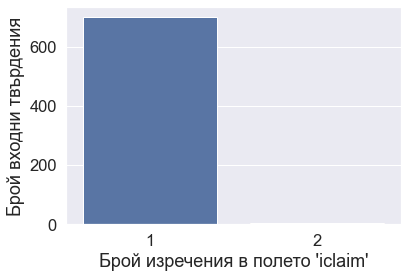

In [335]:
plot_iclaim = sns.countplot(x='iclaims_sent_cnt', data=iclaims_politifact )
plot_iclaim.set(xlabel='Брой изречения в полето \'iclaim\'', ylabel='Брой входни твърдения')

plot_iclaim

<AxesSubplot:xlabel="Брой изречения в полето 'vclaim'", ylabel='Брой проверени твърдения'>

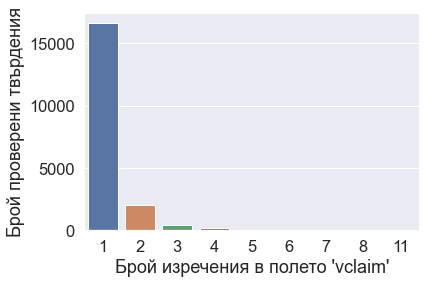

In [332]:
plot_vclaim = sns.countplot(x='vclaim_sent_cnt', data=vclaims_politifact )
plot_vclaim.set(xlabel='Брой изречения в полето \'vclaim\'', ylabel='Брой проверени твърдения')

plot_vclaim

<AxesSubplot:xlabel="Брой изречения в полето 'title'", ylabel='Брой проверени твърдения'>

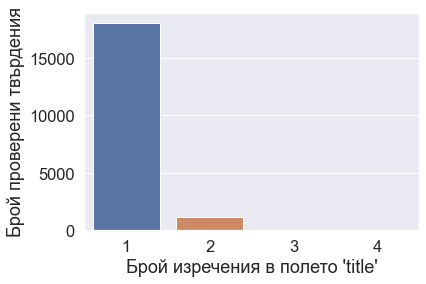

In [333]:
plot_title = sns.countplot(x='title_sent_cnt', data=vclaims_politifact )
plot_title.set(xlabel='Брой изречения в полето \'title\'', ylabel='Брой проверени твърдения')

plot_title

<AxesSubplot:xlabel="Брой изречения в полето 'text'", ylabel='Брой проверени твърдения'>

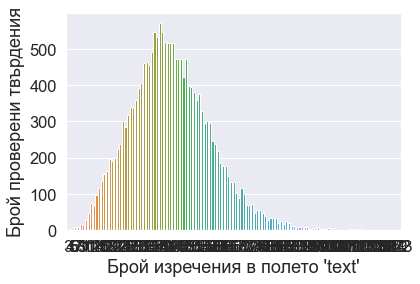

In [336]:
plot_text = sns.countplot(x='text_sent_cnt', data=vclaims_politifact )
plot_text.set(xlabel='Брой изречения в полето \'text\'', ylabel='Брой проверени твърдения')

plot_text

<AxesSubplot:xlabel="Брой изречения в полето 'text'">

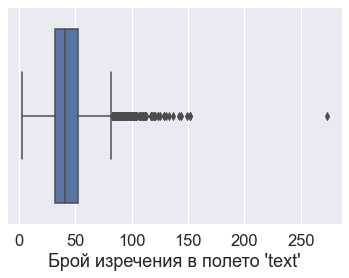

In [340]:
boxplot_text = sns.boxplot(x='text_sent_cnt', data=vclaims_politifact )
boxplot_text.set(xlabel='Брой изречения в полето \'text\'')
boxplot_text

In [337]:
vclaims_politifact['text_sent_cnt'].describe()

count    19250.000000
mean        42.339584
std         15.759098
min          3.000000
25%         32.000000
50%         41.000000
75%         52.000000
max        273.000000
Name: text_sent_cnt, dtype: float64

### Date

In [342]:
iclaims_date_politifact_path = '../rank_train/iclaims_date.tsv'
vclaims_date_politifact_path = '../rank_train/vclaims_date.tsv'

In [343]:
iclaims_date_politifact = pd.read_csv(iclaims_date_politifact_path, sep='\t', names = ['iclaim_id', 'date_seconds'])
vclaims_date_politifact = pd.read_csv(vclaims_date_politifact_path, sep='\t', names = ['vclaim_id', 'date_seconds'])

In [344]:
iclaims_date_politifact = dict(zip(iclaims_date_politifact['iclaim_id'],iclaims_date_politifact['date_seconds']))
vclaims_date_politifact = dict(zip(vclaims_date_politifact['vclaim_id'],vclaims_date_politifact['date_seconds']))

In [350]:
import math

gold_iclaim_dates = []
gold_vclaim_dates = []
gold_dates_diff = []

for idx, row in train_gold_politifact.iterrows():
    iclaim_date = iclaims_date_politifact[row['iclaim_id']]
    vclaim_date = vclaims_date_politifact[row['vclaim_id']]
    gold_iclaim_dates.append(iclaim_date)
    gold_vclaim_dates.append(vclaim_date)
    diff = abs(iclaim_date - vclaim_date)
    
    if diff > 0:
        diff = int(diff /86000) #conv secondss to hours #math.log(diff)
        
    gold_dates_diff.append(diff)


In [351]:
train_gold_politifact['iclaim_date'] = gold_iclaim_dates
train_gold_politifact['vclaim_date'] = gold_vclaim_dates
train_gold_politifact['date_diff_days'] = gold_dates_diff

In [352]:
train_gold_politifact

,iclaim_id,0,vclaim_id,relevance,iclaim_date,vclaim_date,iclaim_vclaim_date_diff,date_diff_days
0,20121023_third_presidential_debate_0959,0,vclaim-pol-10105,1,1.350940e+09,1.350853e+09,1.0,1.0
1,20121023_third_presidential_debate_0985,0,vclaim-pol-10353,1,1.350940e+09,1.347829e+09,36.0,36.0
2,20121023_third_presidential_debate_0753,0,vclaim-pol-10107,1,1.350940e+09,1.350853e+09,1.0,1.0
3,20121023_third_presidential_debate_0473,0,vclaim-pol-10108,1,1.350940e+09,1.350853e+09,1.0,1.0
4,20121023_third_presidential_debate_0609,0,vclaim-pol-10109,1,1.350940e+09,1.350853e+09,1.0,1.0
...,...,...,...,...,...,...,...,...
557,20170713_Trump_Roberston_interiew_0313,0,vclaim-pol-03512,1,1.499893e+09,1.490479e+09,109.0,109.0
558,20170713_Trump_Roberston_interiew_0314,0,vclaim-pol-03158,1,1.499893e+09,1.498597e+09,15.0,15.0
559,20170713_Trump_Roberston_interiew_0314,0,vclaim-pol-03512,1,1.499893e+09,1.490479e+09,109.0,109.0
560,20170724_Trump_Healthcare_0095,0,vclaim-pol-03512,1,1.500844e+09,1.490479e+09,120.0,120.0


In [353]:
train_gold_politifact['date_diff_days'].describe()

count     562.000000
mean      143.028470
std       344.380592
min         0.000000
25%         0.000000
50%        28.000000
75%       123.000000
max      3056.000000
Name: date_diff_days, dtype: float64

[Text(0.5, 0, 'Разлика в брой дни между датите на входното \n и провереното твърдение от обучаващите данни')]

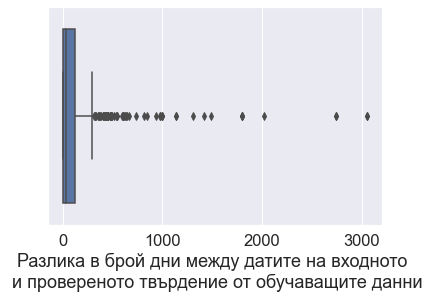

In [355]:
boxplot_diff_days_politifact = sns.boxplot(x=train_gold_politifact['date_diff_days'])
boxplot_diff_days_politifact.set(xlabel='Разлика в брой дни между датите на входното \n и провереното твърдение от обучаващите данни')

[Text(0.5, 0, 'Разлика в брой дни между датите на входното \n и провереното твърдение от обучаващите данни \n (без outlier-ите)')]

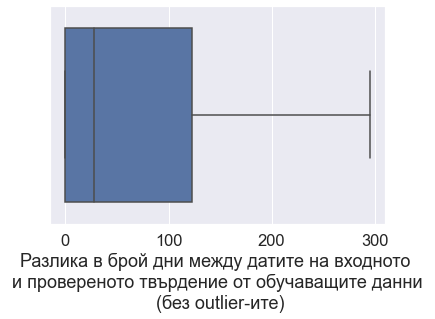

In [357]:
boxplot_diff_days_politifact = sns.boxplot(x=train_gold_politifact['date_diff_days'], showfliers = False)
boxplot_diff_days_politifact.set(xlabel='Разлика в брой дни между датите на входното \n и провереното твърдение от обучаващите данни \n (без outlier-ите)')